<a href="https://colab.research.google.com/github/suarezg/BajaCarProject/blob/master/cs480_fall20_asst4_cnn_cifar10_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# libraries (do not import additional libraries)
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import math
import matplotlib.pyplot as plt

# parameters for this script
batch_size = 32
num_classes = 10
data_augmentation = False
print_summaries = True
verbose = 0


# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# create a callback that will save the best model while training
save_best_model = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose = verbose)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [11]:
def create_original_cnn(modelName):
  # Define a convolutional neural network
  model = Sequential(name = modelName)
  model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  # for layer in model.layers: 
  #   print(layer.get_config(), layer.get_weights())

  return model

def create_no_dropout_network(modelName):
  # No Dropout Model
  model = Sequential(name = modelName)
  model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  return model

def create_save_callback(filename):
  save_best_model = ModelCheckpoint(filename, monitor='val_accuracy', mode='max', save_best_only=True, verbose=verbose)
  return save_best_model

**PART 1**

Training and Evaluating Original CNN
Model: "Original_CNN_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (

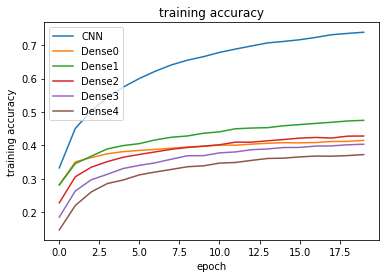

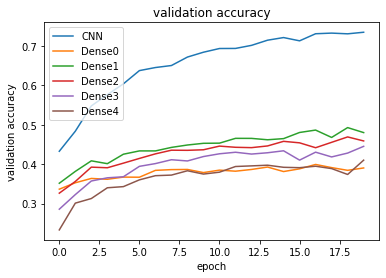

CNN Test Accuracy: 0.7279000282287598
DenseNN (0 hidden layers) Test Accuracy: 0.401300
DenseNN (1 hidden layers) Test Accuracy: 0.494500
DenseNN (2 hidden layers) Test Accuracy: 0.471400
DenseNN (3 hidden layers) Test Accuracy: 0.443500
DenseNN (4 hidden layers) Test Accuracy: 0.412200


In [7]:
### PART 1 ###
epochs = 20

## Convolutional Neural Network
print('Training and Evaluating Original CNN')
cnn_model = create_original_cnn('Original_CNN_Model')
cnn_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if print_summaries:
  print(cnn_model.summary())

cnn_filename = 'best_cnn_model.h5'
save_best_model = create_save_callback(cnn_filename)
cnn_history = cnn_model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model])
best_model = load_model(cnn_filename)
cnn_scores = best_model.evaluate(x_test, y_test, verbose = verbose)

#-------------------------------------------------------------------------------
## Dense Neural Networks
num_relu = 512
dropout_rate = 0.5

# 0 activation layers
dense_model0 = Sequential(name="0_layer_DenseNN")
dense_model0.add(Flatten(input_shape=x_train.shape[1:]))    # input layer
dense_model0.add(Dense(num_classes, activation="softmax"))  # output layer
dense_model0.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# 1 activation layer
dense_model1 = Sequential(name="1_layer_DenseNN")
dense_model1.add(Flatten(input_shape=x_train.shape[1:])) 
dense_model1.add(Dense(num_relu, activation="relu"))        #first
dense_model1.add(Dropout(dropout_rate))
dense_model1.add(Dense(num_classes, activation="softmax"))  
dense_model1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# 2 activation layers
dense_model2 = Sequential(name="2_layer_DenseNN")
dense_model2.add(Flatten(input_shape=x_train.shape[1:]))
dense_model2.add(Dense(num_relu, activation="relu"))        # first
dense_model2.add(Dropout(dropout_rate))
dense_model2.add(Dense(num_relu, activation="relu"))        # second
dense_model2.add(Dropout(dropout_rate))
dense_model2.add(Dense(num_classes, activation="softmax"))
dense_model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# 3 activation layers
dense_model3 = Sequential(name="3_layer_DenseNN")
dense_model3.add(Flatten(input_shape=x_train.shape[1:]))
dense_model3.add(Dense(num_relu, activation="relu"))        # first
dense_model3.add(Dropout(dropout_rate))
dense_model3.add(Dense(num_relu, activation="relu"))        # second
dense_model3.add(Dropout(dropout_rate))
dense_model3.add(Dense(num_relu, activation="relu"))        # third
dense_model3.add(Dropout(dropout_rate))
dense_model3.add(Dense(num_classes, activation="softmax"))
dense_model3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# 4 activation layers
dense_model4 = Sequential(name="4_layer_DenseNN")
dense_model4.add(Flatten(input_shape=x_train.shape[1:]))
dense_model4.add(Dense(num_relu, activation="relu"))        # first
dense_model4.add(Dropout(dropout_rate))
dense_model4.add(Dense(num_relu, activation="relu"))        # second
dense_model4.add(Dropout(dropout_rate))
dense_model4.add(Dense(num_relu, activation="relu"))        # third
dense_model4.add(Dropout(dropout_rate))
dense_model4.add(Dense(num_relu, activation="relu"))        # fourth
dense_model4.add(Dropout(dropout_rate))             
dense_model4.add(Dense(num_classes, activation="softmax")) 
dense_model4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if print_summaries:
  print(dense_model0.summary())
  print(dense_model1.summary())
  print(dense_model2.summary())
  print(dense_model3.summary())
  print(dense_model4.summary())

denseNN_models = [dense_model0, dense_model1, dense_model2, dense_model3, dense_model4]
denseNN_histories = []
denseNN_scores = []
denseNN_labels = [] # for graph legend
for i in range(0, len(denseNN_models)):
  print("Training and Evaluating Dense Model (%d hidden layers)" % i)
  
  denseNN = denseNN_models[i]
  denseNN_labels.append('Dense%d' % i )  
  denseNN_filename = 'best_dense%d_model.h5' % i 
  save_best_model = create_save_callback(denseNN_filename)
  # Train
  dense_history = denseNN.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model])
  denseNN_histories.append(dense_history)
  
  # Evaluate
  best_model = load_model(denseNN_filename)
  denseNN_score = best_model.evaluate(x_test, y_test, verbose = verbose) 
  denseNN_scores.append(denseNN_score) 

#-------------------------------------------------------------------------------

legend = ['CNN'] + denseNN_labels
# Plot training accuracy
plt.plot(cnn_history.history['accuracy'])
for dHistory in denseNN_histories:
  plt.plot(dHistory.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(legend, loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(cnn_history.history['val_accuracy'])
for dHistory in denseNN_histories:
  plt.plot(dHistory.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(legend, loc='upper left')
plt.show()

# Print scores
print('CNN Test Accuracy:', cnn_scores[1])
for i in range(0,len(denseNN_scores)):
  score = denseNN_scores[i]
  print('DenseNN (%d hidden layers) Test Accuracy: %f' % (i, score[1]))


*Part 1 Discussion*

**PART 2**

Training and Evaluating ReLU model (original CNN)
Model: "ReLU_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d

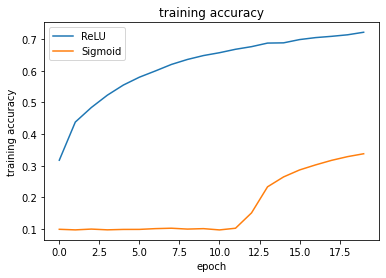

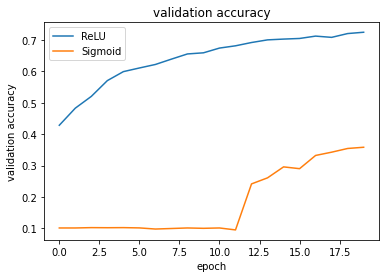

ReLU Test Accuracy: 0.7210999727249146
Sigmoid Test Accuracy: 0.3686999976634979


In [9]:
### PART 2 ###
epochs = 20

## CNN with ReLU (original model)
print('Training and Evaluating ReLU model (original CNN)')
relu_filename = 'best_relu_model.h5'
relu_model = create_original_cnn('ReLU_Model')
relu_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if print_summaries:
  print(relu_model.summary())

save_best_model = create_save_callback(relu_filename)
relu_history = relu_model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model])
best_model = load_model(relu_filename)
relu_scores = best_model.evaluate(x_test, y_test, verbose = verbose)

#-------------------------------------------------------------------------------
## CNN with sigmoid activation
sigmoid_model = Sequential(name = 'Sigmoid_Model')
sigmoid_model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
sigmoid_model.add(Activation('sigmoid'))
sigmoid_model.add(Conv2D(32, (3, 3), padding='same'))
sigmoid_model.add(Activation('sigmoid'))
sigmoid_model.add(MaxPooling2D(pool_size=(2, 2)))
sigmoid_model.add(Dropout(0.25))

sigmoid_model.add(Conv2D(64, (3, 3), padding='same'))
sigmoid_model.add(Activation('sigmoid'))
sigmoid_model.add(Conv2D(64, (3, 3), padding='same'))
sigmoid_model.add(Activation('sigmoid'))
sigmoid_model.add(MaxPooling2D(pool_size=(2, 2)))
sigmoid_model.add(Dropout(0.25))

sigmoid_model.add(Flatten())
sigmoid_model.add(Dense(512))
sigmoid_model.add(Activation('sigmoid'))
sigmoid_model.add(Dropout(0.5))
sigmoid_model.add(Dense(num_classes))
sigmoid_model.add(Activation('softmax'))

sigmoid_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if print_summaries:
  print(sigmoid_model.summary())

print('Training and Evaluating Sigmoid model')
sigmoid_filename = 'best_sigmoid_model.h5'
save_best_model = create_save_callback(sigmoid_filename)
sigmoid_history = sigmoid_model.fit(x_train, y_train,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    validation_data=(x_validate, y_validate),
                                    shuffle=True,
                                    callbacks=[save_best_model])
best_model = load_model(sigmoid_filename)
sigmoid_scores = best_model.evaluate(x_test, y_test, verbose = verbose)

#-------------------------------------------------------------------------------
# Plot training accuracy
plt.plot(relu_history.history['accuracy'])
plt.plot(sigmoid_history.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['ReLU', 'Sigmoid'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(relu_history.history['val_accuracy'])
plt.plot(sigmoid_history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['ReLU', 'Sigmoid'], loc='upper left')
plt.show()

print('ReLU Test Accuracy:', relu_scores[1])
print('Sigmoid Test Accuracy:', sigmoid_scores[1])

*Part 2 Discussion*

The network that utilizes the ReLU activation function performed *much* better than the network utilizing the sigmoid activation function.

We know that networks utilizing the sigmoid function would suffer from the vanishing gradient problem. This is caused because the gradient of the sigmoid is bounded between 0 and 1, and the gradient at the tail ends of the sigmoid are very small (~0). With deep networks, the propagation of this small gradient will cause marginal changes in the weights at the input layer. 

In comparison, the ReLU activation function is a curve that has a linear part (gradient of 1) and a "flat" part (gradient of 0). The linear part alleviates the vanishing gradient problem because the gradient is consistent no matter how far down the tail end we go.

In the results, we can see that the sigmoid model performed poorly compared to the ReLU model, which is consistent with theory.

Curiously, at some epoch (epoch = 13 in the results above), the accuracy jumps up considerably from the previous epochs. A possible explanation for this is that the propagated changes up to this epoch had changed some weights in a way that improved the network.




**PART 3**


Training and Evaluating Dropout + No Augmentation (original CNN)
Model: "Drop_NoAug_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_48 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_49 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 16, 16, 32)        0         
___________________________________________________

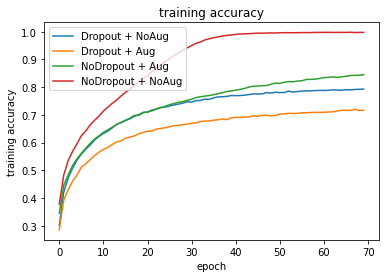

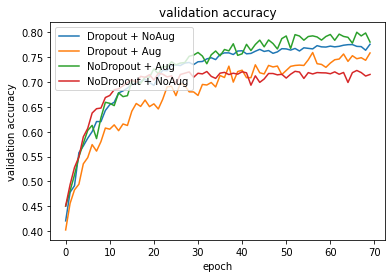

Dropout + No Augment Test Accuracy 0.7675999999046326
Dropout + Augment Test Accuracy 0.7490000128746033
No Dropout + Augment Test Accuracy 0.7980999946594238
No Dropout + No Augment Test Accuracy 0.7081999778747559


In [12]:
### PART 3 ###
epochs = 70

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

#-------------------------------------------------------------------------------
# With dropout and no data augmentation  
print('Training and Evaluating Dropout + No Augmentation (original CNN)')
drop_noaug_filename = 'best_drop_noaug_model.h5'
drop_noaug_model = create_original_cnn('Drop_NoAug_Model')
drop_noaug_model.compile(loss='categorical_crossentropy',
                          optimizer=opt,
                          metrics=['accuracy'])

if print_summaries:
  print(drop_noaug_model.summary())

save_best_model = create_save_callback(drop_noaug_filename)
drop_noaug_history = drop_noaug_model.fit(x_train, y_train,
                                          batch_size=batch_size,
                                          epochs=epochs,
                                          validation_data=(x_validate, y_validate),
                                          shuffle=True,
                                          callbacks=[save_best_model])
best_model = load_model(drop_noaug_filename)
drop_noaug_scores = best_model.evaluate(x_test, y_test, verbose = verbose)

#-------------------------------------------------------------------------------
## With dropout and data augmentation
print('Training and Evaluating Dropout + Augmentation model')
drop_aug_filename = 'best_drop_aug_model.h5'
drop_aug_model = create_original_cnn('Drop_Aug_Model')
drop_aug_model.compile(loss='categorical_crossentropy',
                        optimizer=opt,
                        metrics=['accuracy'])

if print_summaries:
  print(drop_aug_model.summary())

save_best_model = create_save_callback(drop_aug_filename)
drop_aug_history = drop_aug_model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                                      steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                                      epochs=epochs,
                                      validation_data=(x_validate, y_validate),
                                      callbacks=[save_best_model])
best_model = load_model(drop_aug_filename)
drop_aug_scores = best_model.evaluate(x_test, y_test, verbose = verbose)

#-------------------------------------------------------------------------------
## Without dropout and with data augmentation
print('Training and Evaluating No Dropout + Augmentation model')
nodrop_aug_filename = 'best_nodrop_aug_model.h5'
nodrop_aug_model = create_no_dropout_network('NoDrop_Aug_Model')
nodrop_aug_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if print_summaries:
  print(nodrop_aug_model.summary())

save_best_model = create_save_callback(nodrop_aug_filename)
nodrop_aug_history = nodrop_aug_model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                                          steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                                          epochs=epochs,
                                          validation_data=(x_validate, y_validate),
                                          callbacks=[save_best_model])
best_model = load_model(nodrop_aug_filename)
nodrop_aug_scores = best_model.evaluate(x_test, y_test, verbose = verbose)

#-------------------------------------------------------------------------------
## Without dropout and no data augmentation
print('Training and Evaluating No Dropout + No Augmentation model')
nodrop_noaug_filename = 'best_nodrop_noaug_model.h5'
nodrop_noaug_model = create_no_dropout_network('NoDrop_NoAug_Model')
nodrop_noaug_model.compile(loss='categorical_crossentropy',
                          optimizer=opt,
                          metrics=['accuracy'])

if print_summaries:
  print(nodrop_noaug_model.summary())

save_best_model = create_save_callback(nodrop_noaug_filename)
nodrop_noaug_history = nodrop_noaug_model.fit(x_train, y_train,
                                              batch_size=batch_size,
                                              epochs=epochs,
                                              validation_data=(x_validate, y_validate),
                                              shuffle=True,
                                              callbacks=[save_best_model])
best_model = load_model(nodrop_noaug_filename)
nodrop_noaug_scores = best_model.evaluate(x_test, y_test, verbose = verbose)

#-------------------------------------------------------------------------------
# Plot training accuracy
plt.plot(drop_noaug_history.history['accuracy'])
plt.plot(drop_aug_history.history['accuracy'])
plt.plot(nodrop_aug_history.history['accuracy'])
plt.plot(nodrop_noaug_history.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Dropout + NoAug', 'Dropout + Aug', 'NoDropout + Aug', 'NoDropout + NoAug'], 
           loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(drop_noaug_history.history['val_accuracy'])
plt.plot(drop_aug_history.history['val_accuracy'])
plt.plot(nodrop_aug_history.history['val_accuracy'])
plt.plot(nodrop_noaug_history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['Dropout + NoAug', 'Dropout + Aug', 'NoDropout + Aug', 'NoDropout + NoAug'], 
           loc='upper left')
plt.show()

# Print test accuracy
print('Dropout + No Augment Test Accuracy', drop_noaug_scores[1])
print('Dropout + Augment Test Accuracy', drop_aug_scores[1])
print('No Dropout + Augment Test Accuracy', nodrop_aug_scores[1])
print('No Dropout + No Augment Test Accuracy', nodrop_noaug_scores[1])


*Part 3 Discussion*

Deep neural networks suffer from overfitting due to the large amount of parameters/weights needed for the layers of the networks. Dropout and data augmentation are two techniques that address this issue.

Dropout is a technique that "mutilates" the original network by removing nodes from layers (input or hidden layers) during the training process based on a pre-defined dropout rate. The effect of mutilating the network causes the network to be more robust

Data Augmentation is a technique that generates more data from the existing data by manipulating it in some way. For example, images can be rotated and mirrored to generate more training that can be used during training. The more data the network can train on, the more robust the network is.

In theory, we expect these models that contain a form of dropout or data augmentation to be more robust and generalize better.

The model trained without dropout and without data augmentation had very high training accuracy (near 1) but poor test accuracy relative to its training accuracy (~0.70). This indicates that the model is suffering from overfitting which is a known possibility considering the theory.

As expected, the models that utilized dropout and/or data augmentation performed better during testing than the model that did not incorporate either technique, and the difference in training and testing accuracy were much closer.The models that utilized only dropout or only data augmentation had higher training accuracies than the test accuracy, which hints at some overfitting. The model with dropout and data augmentation did not exhibit this behavior.

The results show that the model that performed best during testing was the no dropout + data augmentation model. This is a bit surprising as prior to running the experiment, I expected the model that utilized both dropout and data augmentation to perform best. However, examining the graph, the test accuracy of this model appears to be trending upward at a higher rate than the other models. We can speculate that with a longer training time (i.e. more epochs), the dropout + data augmentation model would perform the best.



**PART 4**

Training model with RMS optimizer
Model: "RMSprop_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_100 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_101 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_68 (Conv2D) 

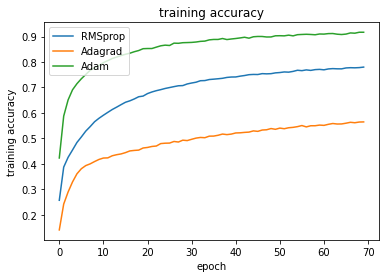

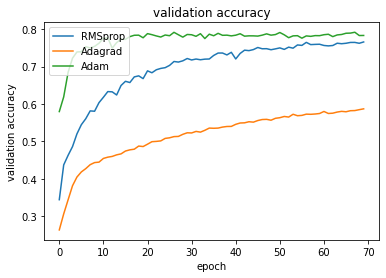

RMSprop Accuracy:  0.7595000267028809
Adagrad Accuracy:  0.5910999774932861
Adam Accuracy:  0.7833999991416931


In [15]:
### PART 4 ###
epochs = 70

# RMSprop
print('Training model with RMS optimizer')
rms_filename = 'best_rms_model.h5'
rms_model = create_original_cnn('RMSprop_Model')
rms_model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

if print_summaries:
  print(rms_model.summary())

save_best_model = create_save_callback(rms_filename)
rms_history = rms_model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(x_validate, y_validate),
                            shuffle=True,
                            callbacks=[save_best_model])
best_model = load_model(rms_filename)
rms_scores = best_model.evaluate(x_test, y_test, verbose = verbose)

# Adagrad
print('Training model with Adagrad optimizer')
adagrad_opt = keras.optimizers.Adagrad()
adagrad_filename = 'best_adagrad_model.h5'
adagrad_model = create_original_cnn('Adagrad_Model')
adagrad_model.compile(loss='categorical_crossentropy',
                      optimizer=adagrad_opt,
                      metrics=['accuracy'])

if print_summaries:
  print(adagrad_model.summary())

save_best_model = create_save_callback(adagrad_filename)
adagrad_history = adagrad_model.fit(x_train, y_train,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    validation_data=(x_validate, y_validate),
                                    shuffle=True,
                                    callbacks=[save_best_model])
best_model = load_model(adagrad_filename)
adagrad_scores = best_model.evaluate(x_test, y_test, verbose = verbose)

# Adam
print('Training model with Adam optimizer')
adam_opt = keras.optimizers.Adam()
adam_filename = 'best_adam_model.h5'
adam_model = create_original_cnn('Adam_Model')
adam_model.compile(loss='categorical_crossentropy',
                    optimizer=adam_opt,
                    metrics=['accuracy'])

if print_summaries:
  print(adam_model.summary())

save_best_model = create_save_callback(adam_filename)
adam_history = adam_model.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              validation_data=(x_validate, y_validate),
                              shuffle=True,
                              callbacks=[save_best_model])
best_model = load_model(adam_filename)
adam_scores = best_model.evaluate(x_test, y_test, verbose = verbose)

#-------------------------------------------------------------------------------
# Plot training accuracy
plt.plot(rms_history.history['accuracy'])
plt.plot(adagrad_history.history['accuracy'])
plt.plot(adam_history.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['RMSprop', 'Adagrad', 'Adam'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(rms_history.history['val_accuracy'])
plt.plot(adagrad_history.history['val_accuracy'])
plt.plot(adam_history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['RMSprop', 'Adagrad', 'Adam'], loc='upper left')
plt.show()

# Print test accuracy
print('RMSprop Accuracy: ', rms_scores[1])
print('Adagrad Accuracy: ', adagrad_scores[1])
print('Adam Accuracy: ', adam_scores[1])

*Part 4 Discussion*

RMSprop, Adagrad, and Adam are heuristics for updating the weights of the neural network based on the gradient.

We can see from the results Adagrad performs MUCH worse in testing than RMSprop or Adam. This is consistent with the known problem of Adagrad - the learning rate decays too quickly. This means the amount we are changing the weights by at each epoch are getting smaller at a quicker rate than the other optimizers. As we get to later epochs, the updates to the weights become marginal, preventing improvement. 

Examining the graph, Adam shows very quick improvement of training and validation accuracy in comparison to RMSprop and Adagrad. This is because the moving average of the gradient is considered in the weight update gradient calculation. This helps "induce momentum" as the step sizes for gradient descent can increase based on the direction of the recent gradients. However, Adam appears to be overfitting, reporting training accuracy ~10% higher than the validation accuracy in later epochs. 

In comparison to Adam, RMSprop does not improve as quick. This is consistent with the known problem of RMSprop (as discussed in lecture) - "the gradient lacks momentum". RMSprop does not provide a way to increase step size when the more recent gradients are in the same direction. Another thing to note is that the result do not exhibit overfitting behavior.

**PART 5**

Training CNN with 3x3 filters (original model)
Model: "Original_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_90 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_91 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2

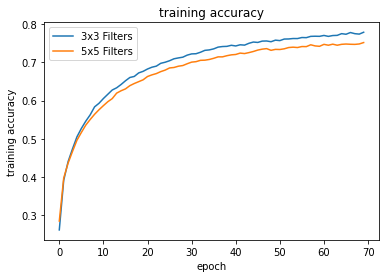

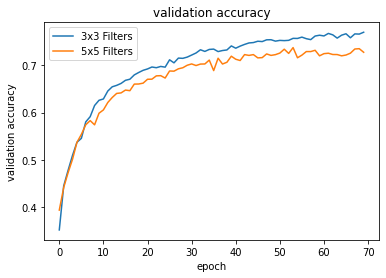

3x3 Filter Model Accuracy:  0.765500009059906
5x5 Filter Model Accuracy:  0.728600025177002


In [14]:
### PART 5 ###
epochs = 70

# Original Model with 3x3 filters
print('Training CNN with 3x3 filters (original model)')
orig_model_filename = 'best_orig_model.h5'
orig_model = create_original_cnn('Original_Model')
orig_model.compile(loss='categorical_crossentropy',
                    optimizer=opt,
                    metrics=['accuracy'])

if print_summaries:
  print(orig_model.summary())

save_best_model = create_save_callback(orig_model_filename)
orig_history = orig_model.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              validation_data=(x_validate, y_validate),
                              shuffle=True,
                              callbacks=[save_best_model])
best_model = load_model(orig_model_filename)
orig_scores = best_model.evaluate(x_test, y_test, verbose = verbose)

# Modified model with 5x5 filters
print('Training CNN with 5x5 filters')
modified_model = Sequential(name = 'Modified_Model')
modified_model.add(Conv2D(32, (5, 5), padding='same',input_shape=x_train.shape[1:]))
modified_model.add(Activation('relu'))
modified_model.add(MaxPooling2D(pool_size=(2, 2)))
modified_model.add(Dropout(0.25))

modified_model.add(Conv2D(64, (5, 5), padding='same'))
modified_model.add(Activation('relu'))
modified_model.add(MaxPooling2D(pool_size=(2, 2)))
modified_model.add(Dropout(0.25))

modified_model.add(Flatten())
modified_model.add(Dense(512))
modified_model.add(Activation('relu'))
modified_model.add(Dropout(0.5))
modified_model.add(Dense(num_classes))
modified_model.add(Activation('softmax'))

modified_model_filename = 'best_modified_model.h5'
modified_model.compile(loss='categorical_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy'])

if print_summaries:
  print(modified_model.summary())

save_best_model = create_save_callback(modified_model_filename)
modified_history = modified_model.fit(x_train, y_train,
                                      batch_size=batch_size,
                                      epochs=epochs,
                                      validation_data=(x_validate, y_validate),
                                      shuffle=True,
                                      callbacks=[save_best_model])
best_model = load_model(modified_model_filename)
modified_scores = best_model.evaluate(x_test, y_test, verbose = verbose)

#-------------------------------------------------------------------------------
# Plot training accuracy
plt.plot(orig_history.history['accuracy'])
plt.plot(modified_history.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['3x3 Filters', '5x5 Filters'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(orig_history.history['val_accuracy'])
plt.plot(modified_history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['3x3 Filters', '5x5 Filters'], loc='upper left')
plt.show()

# Print test accuracy
print('3x3 Filter Model Accuracy: ', orig_scores[1])
print('5x5 Filter Model Accuracy: ', modified_scores[1])


*Part 5 Discussion*



The graphs and the test accuracy show that the stack of 3x3 filters perform better than smaller stack of 5x5 filters. This is consistent with what is 

Neither model exhibit a noticeable amount of overfitting